# ANALYSIS OF AUSTRALIAN ELECTION 2019 TWEETS WITH PYTHON
## BACKGROUND
This project will discuss about Australian Election 2019 tweets, I will try to find the pattern of Australian election from count of tweets, the most popular tweets, where the tweets came from, and so on. Also, I try to analyze how the position of the most popular political parties in Australia through the tweets.

The dataset is obtained from kaggle https://www.kaggle.com/ratan123/data-analysis-of-tweets-on-australian-election/data

## 1. Upload the datasets

In [1]:
# Download the dataset and save in the directory
# ! kaggle datasets download -d taniaj/australian-election-2019-tweets

In [2]:
# import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# read the first dataset
df1 = pd.read_csv('auspol2019.csv')

# display the dataset
df1.head()

created_at                   id  \
0  2019-05-20 09:13:44  1130401208756187136   
1  2019-05-20 09:13:43  1130401205367140357   
2  2019-05-20 09:13:33  1130401162782371841   
3  2019-05-20 09:13:29  1130401143551434753   
4  2019-05-20 09:13:23  1130401118666809345   

                                           full_text  retweet_count  \
0  After the climate election: shellshocked green...            0.0   
1  @narendramodi @smritiirani Coverage of indian ...            0.0   
2  @workmanalice Do you know if Facebook is relea...            0.0   
3  @vanbadham We all understand we have a compuls...            0.0   
4  Shares were mixed in Asia, with India and Aust...            0.0   

   favorite_count       user_id          user_name user_screen_name  \
0             0.0  9.248486e+07       PIPELINEPETE         jocksjig   
1             0.0  7.756474e+08    Narinder Parmar      nparmar1957   
2             0.0  5.687300e+04        Peter Wells       peterwells   
3             0.0  9.081660e+17        The Realist    therealist822   
4             0.0  5.260074e+08  Inquirer Business      InquirerBiz   

                                    user_description  \
0  Retired Tradesman and Progressive Anti Conserv...   
1  Life coach & trainer, Motivational speaker, Ma...   
2  Writes for @theage and @smh on technology and ...   
3  Calls it as I see it. Anti PC, SJW and VS. If ...   
4  The official Twitter account of the Inquirer G...   

                user_location      user_created_at  
0        Brisbane, Queensland  2009-11-25 09:19:45  
1  Wollongong, NSW, AUSTRALIA  2012-08-23 10:20:40  
2                   Melbourne  2006-12-11 07:38:06  
3                         NaN  2017-09-14 03:10:30  
4                 Philippines  2012-03-16 03:51:59

In [4]:
# display info the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183379 entries, 0 to 183378
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   created_at        183379 non-null  object 
 1   id                183379 non-null  object 
 2   full_text         183379 non-null  object 
 3   retweet_count     183370 non-null  float64
 4   favorite_count    183370 non-null  float64
 5   user_id           183370 non-null  float64
 6   user_name         183358 non-null  object 
 7   user_screen_name  183370 non-null  object 
 8   user_description  167659 non-null  object 
 9   user_location     146485 non-null  object 
 10  user_created_at   183361 non-null  object 
dtypes: float64(3), object(8)
memory usage: 15.4+ MB


In [5]:
# read the second dataset
df2 = pd.read_csv('location_geocode.csv')

# display the dataset
df2.head() 

name        lat        long
0        Brisbane, Queensland -27.469771  153.025124
1  Wollongong, NSW, AUSTRALIA -34.427812  150.893061
2                   Melbourne -37.813628  144.963058
3                 Philippines  12.879721  121.774017
4                   Australia -25.274398  133.775136

In [6]:
# join the dataset
twitter_df = df1.merge(df2, how = 'inner', left_on='user_location', right_on='name')

# display the dataset's info
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135380 entries, 0 to 135379
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   created_at        135380 non-null  object 
 1   id                135380 non-null  object 
 2   full_text         135380 non-null  object 
 3   retweet_count     135380 non-null  float64
 4   favorite_count    135380 non-null  float64
 5   user_id           135380 non-null  float64
 6   user_name         135380 non-null  object 
 7   user_screen_name  135380 non-null  object 
 8   user_description  129808 non-null  object 
 9   user_location     135380 non-null  object 
 10  user_created_at   135380 non-null  object 
 11  name              135380 non-null  object 
 12  lat               135380 non-null  float64
 13  long              135380 non-null  float64
dtypes: float64(5), object(9)
memory usage: 15.5+ MB


In [7]:
# change datatype date from the dataset
twitter_df['created_at'] = pd.to_datetime(twitter_df['created_at'], format='%Y-%m-%d')
twitter_df['user_created_at'] = pd.to_datetime(twitter_df['user_created_at'], format='%Y-%m-%d')

# display the dataset's info
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135380 entries, 0 to 135379
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   created_at        135380 non-null  datetime64[ns]
 1   id                135380 non-null  object        
 2   full_text         135380 non-null  object        
 3   retweet_count     135380 non-null  float64       
 4   favorite_count    135380 non-null  float64       
 5   user_id           135380 non-null  float64       
 6   user_name         135380 non-null  object        
 7   user_screen_name  135380 non-null  object        
 8   user_description  129808 non-null  object        
 9   user_location     135380 non-null  object        
 10  user_created_at   135380 non-null  datetime64[ns]
 11  name              135380 non-null  object        
 12  lat               135380 non-null  float64       
 13  long              135380 non-null  float64       
dtypes: d

In [8]:
# display the dataset
twitter_df.head()

created_at                   id  \
0 2019-05-20 09:13:44  1130401208756187136   
1 2019-05-20 09:12:57  1130401009782673408   
2 2019-05-20 09:02:04  1130398270813949952   
3 2019-05-20 07:25:41  1130374015103537152   
4 2019-05-20 07:12:01  1130370578584461313   

                                           full_text  retweet_count  \
0  After the climate election: shellshocked green...            0.0   
1  It is disappointing that @tanya_plibersek has ...            0.0   
2  'Vote for the climate': NSW demands environmen...            0.0   
3  This is urgent! “False election claims spark p...            0.0   
4  This is a great piece, not least because it pl...            0.0   

   favorite_count       user_id       user_name user_screen_name  \
0             0.0  9.248486e+07    PIPELINEPETE         jocksjig   
1             0.0  5.100258e+07  Matthew Rimmer         DrRimmer   
2             0.0  9.248486e+07    PIPELINEPETE         jocksjig   
3             0.0  3.327641e+08         E Ferri         eneferri   
4             2.0  2.180023e+09  Shahar Hameiri    ShaharHameiri   

                                    user_description         user_location  \
0  Retired Tradesman and Progressive Anti Conserv...  Brisbane, Queensland   
1  Professor of IP & Innovation Law @QUTLaw @QUT_...  Brisbane, Queensland   
2  Retired Tradesman and Progressive Anti Conserv...  Brisbane, Queensland   
3  Writer, researcher, educator in media, adverti...  Brisbane, Queensland   
4  Associate Professor @polsisengage @UQ_news. Po...  Brisbane, Queensland   

      user_created_at                  name        lat        long  
0 2009-11-25 09:19:45  Brisbane, Queensland -27.469771  153.025124  
1 2009-06-26 10:17:54  Brisbane, Queensland -27.469771  153.025124  
2 2009-11-25 09:19:45  Brisbane, Queensland -27.469771  153.025124  
3 2011-07-10 11:20:43  Brisbane, Queensland -27.469771  153.025124  
4 2013-11-07 12:39:24  Brisbane, Queensland -27.469771  153.025124

## 2. Data Analysis

### 2.1 To look what the days of the most created tweets and when the user created the account

<AxesSubplot:>

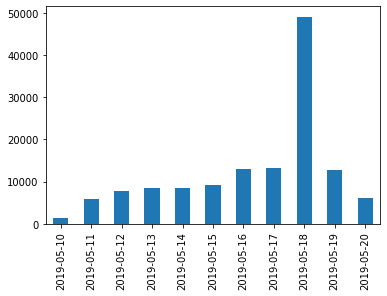

In [9]:
# the date of the most created tweets
# get the date from the created at column
createdat_df= twitter_df['created_at'].dt.date.value_counts().sort_index()

# make the graph
createdat_df.plot.bar()

From the graph can be concluded that most Australian election 2019 tweets are made in 2019-05-18. The date coincides with the the date of the Australian Election

<AxesSubplot:>

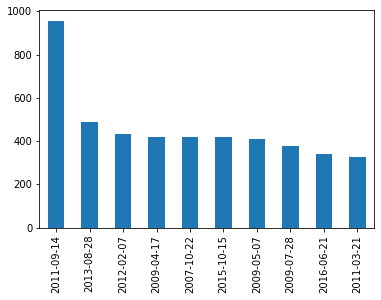

In [10]:
# when the user created the account
# get the date from the user created at column
usercreated_df = twitter_df['user_created_at'].dt.date.value_counts()

# make the graph
usercreated_df = usercreated_df[:10,]
usercreated_df.plot.bar()

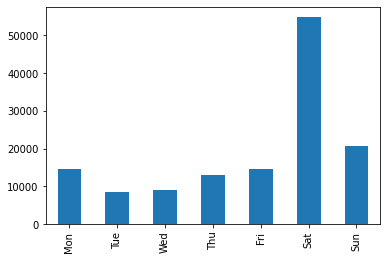

In [11]:
# the days of the most created tweets
# get the days from the created at and user created at columns
twitter_df['created_at_weekday'] = twitter_df['created_at'].dt.dayofweek
twitter_df['user_created_at_weekday'] = twitter_df['user_created_at'].dt.dayofweek

# make the graph
twitter_df['created_at_weekday'].value_counts().sort_index().plot.bar()
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.show()

From the graph can be concluded that most Australian election 2019 tweets are made in saturday. The day coincides with the the day of the Australian Election

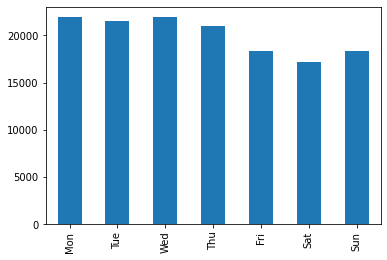

In [12]:
# the days of the created accounts
twitter_df['user_created_at_weekday'].value_counts().plot.bar()
twitter_df['user_created_at_weekday'].value_counts().sort_index().plot.bar()

# make the graph
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.show()

### 2.2 To look what the time of the most created tweet and what the time of created a twitter account

<AxesSubplot:>

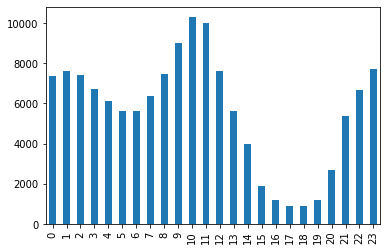

In [13]:
# the time of the most created tweet
# get the hour from the created at and user created at hour column
twitter_df['created_at_hour'] = twitter_df['created_at'].dt.hour
twitter_df['user_created_at_hour'] = twitter_df['user_created_at'].dt.hour

# make the graph
twitter_df['created_at_hour'].value_counts().sort_index().plot.bar()

Can be concluded that the time of the most created tweets is at 10.00 am - 11.00 am

<AxesSubplot:>

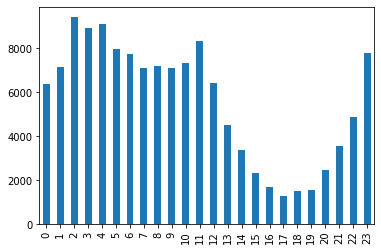

In [14]:
# the time when users created
twitter_df['user_created_at_hour'].value_counts().sort_index().plot.bar()

### 2.2 the most retweeted tweets and favorite tweets

In [15]:
# the most retweeted tweets
print('the most retweed tweets is:', twitter_df['retweet_count'].max())

the most retweed tweets is: 6622.0


In [16]:
# the most retweeted tweet
twitter_df.loc[twitter_df['retweet_count']==6622.0, 'full_text'].values

array(["Shocking defeat for Left in Australia, stunned pollsters and mainstream media who had predicted this election as 'unlosable for Labor'. Conservative @ScottMorrisonMP focused on 'Australian First', Jobs and Imigration, while Labor focused on #ClimateChange https://t.co/hFt7vgwuEd"],
      dtype=object)

In [17]:
# the most favorite tweets
twitter_df['favorite_count'].max()

15559.0

In [18]:
# the most favorite tweets
twitter_df.loc[twitter_df['favorite_count']==15559.0, 'full_text'].values

array(["Shocking defeat for Left in Australia, stunned pollsters and mainstream media who had predicted this election as 'unlosable for Labor'. Conservative @ScottMorrisonMP focused on 'Australian First', Jobs and Imigration, while Labor focused on #ClimateChange https://t.co/hFt7vgwuEd"],
      dtype=object)

the most retweeted tweet and the most favorite tweet are the same

### 2.3 the most user_name that make tweets

In [19]:
twitter_df['user_name'].value_counts()[:10,]

💧 Sur Plus               937
PM of Australia News     464
🌹MsRose🌹                 415
🍌Leftie Troublemaker🍍    386
Jackie Moss ☔️           300
💧 Fierce Dinosaur        296
Ian Carter               279
Election News Bay        256
💧#StopGreed              253
The Australian           238
Name: user_name, dtype: int64

### 2.4 the most location that make tweets

In [20]:
twitter_df['name'].value_counts()[:10,]

Australia                   18372
Melbourne, Victoria          7404
Sydney, Australia            5689
Sydney, New South Wales      5363
Melbourne, Australia         5274
Sydney                       4971
Melbourne                    4278
Canberra                     3395
Perth, Western Australia     2450
Brisbane, Queensland         2436
Name: name, dtype: int64

In [21]:
import plotly
import chart_studio.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go

fig = go.Figure(data=go.Scattergeo(
lon=twitter_df['long'],
lat=twitter_df['lat'],
mode='markers'
))

fig.update_layout(title='the most location that make tweets')
fig.show()


### 2.5 Look at the most talked-about leader of party in the tweets

In [22]:
print('The most talked-about leader of party in the Australian Election 2019:\n')
print('1. Scott Morrison (Liberal):', twitter_df.loc[twitter_df['full_text'].str.contains('Scott' and 'Morrison')].shape[0], 'tweets')
print('2. Bill Shorten (Labor):', twitter_df.loc[twitter_df['full_text'].str.contains('Bill' and 'Shorten')].shape[0], 'tweets')
print('3. Richard Di Natale (Green):', twitter_df.loc[twitter_df['full_text'].str.contains('Richard' and 'Natale')].shape[0], 'tweets')
print("4. Bob Katter (Katter's Australia):", twitter_df.loc[twitter_df['full_text'].str.contains('Bob' and 'Katter')].shape[0], 'tweets' )
                                             

The most talked-about leader of party in the Australian Election 2019:

1. Scott Morrison (Liberal): 11249 tweets
2. Bill Shorten (Labor): 5428 tweets
3. Richard Di Natale (Green): 283 tweets
4. Bob Katter (Katter's Australia): 102 tweets


### 2.6 Look at the most talked-about party in the tweets

In [23]:
print('The most talked-about Party in the Australian Election 2019:\n')
print('1. Liberal:', twitter_df.loc[twitter_df['full_text'].str.contains('Liberal')].shape[0], 'tweets')
print('2. Labor:', twitter_df.loc[twitter_df['full_text'].str.contains('Labor')].shape[0], 'tweets')
print('3. Green:', twitter_df.loc[twitter_df['full_text'].str.contains('Green')].shape[0], 'tweets')
print("4. Katter's Australia:", twitter_df.loc[twitter_df['full_text'].str.contains('Katter')].shape[0], 'tweets' )

The most talked-about Party in the Australian Election 2019:

1. Liberal: 7748 tweets
2. Labor: 15323 tweets
3. Green: 3973 tweets
4. Katter's Australia: 102 tweets


### 2.7 Classifying Tweets based on the most retweet count and favorite count

In [24]:
# find the mean from retweet and favorite tweets
print('The mean', twitter_df['retweet_count'].mean())
print('The median', twitter_df['favorite_count'].mean())

The mean 4.063805584281282
The median 12.054712660658886


In [25]:
# make dataset that contains the data with retweet count and favorite count higher than mean
twitter= twitter_df.loc[(twitter_df['retweet_count']>=4) & (twitter_df['favorite_count']>=12)]

# dispay the data
twitter.head()

created_at                   id  \
60  2019-05-18 13:59:51  1129748433936494594   
68  2019-05-18 12:06:10  1129719825071140866   
76  2019-05-18 11:23:57  1129709201029124096   
77  2019-05-18 11:16:44  1129707384765423616   
151 2019-05-16 07:24:05  1128924063710056449   

                                             full_text  retweet_count  \
60   Yes everyone, your anger with all Queenslander...           19.0   
68   Australia’s a racist hellhole founded on genoc...            4.0   
76   Make absolutely no mistake Australia, tonight’...           17.0   
77   #Queensland is the #Alabama of Australia. I'm ...            5.0   
151  Right now there are 2 Elections happening in A...            6.0   

     favorite_count       user_id                         user_name  \
60             79.0  7.354150e+17                    Daile Kelleher   
68             24.0  8.313634e+17  MJ O'Neill Before The Normal One   
76             28.0  2.359395e+09                         💧▌│█║▌║▌║   
77             38.0  1.849841e+09                         Ian Davis   
151            54.0  2.916126e+09                     Oscar O'Neill   

    user_screen_name                                   user_description  \
60     DaileKelleher  Manager at Children by Choice. Intersectional ...   
68     mjoneillnoise  Communications Wizard & Musical Also-Ran. Tryi...   
76   AnodyneParadigm  “Politics: “Poli” a Latin word meaning "many" ...   
77       Ian_Davis72  Pragmatist, Political observer, Punter, Pontif...   
151         _itsOzzY  17 | 🇦🇺 | Graphic designer for @Dropbearsgg an...   

            user_location     user_created_at                  name  \
60   Brisbane, Queensland 2016-05-25 10:19:26  Brisbane, Queensland   
68   Brisbane, Queensland 2017-02-14 04:44:11  Brisbane, Queensland   
76   Brisbane, Queensland 2014-02-24 11:54:33  Brisbane, Queensland   
77   Brisbane, Queensland 2013-09-10 00:16:39  Brisbane, Queensland   
151  Brisbane, Queensland 2014-12-02 03:43:12  Brisbane, Queensland   

           lat        long  created_at_weekday  user_created_at_weekday  \
60  -27.469771  153.025124                   5                        2   
68  -27.469771  153.025124                   5                        1   
76  -27.469771  153.025124                   5                        0   
77  -27.469771  153.025124                   5                        1   
151 -27.469771  153.025124                   3                        1   

     created_at_hour  user_created_at_hour  
60                13                    10  
68                12                     4  
76                11                    11  
77                11                     0  
151                7                     3

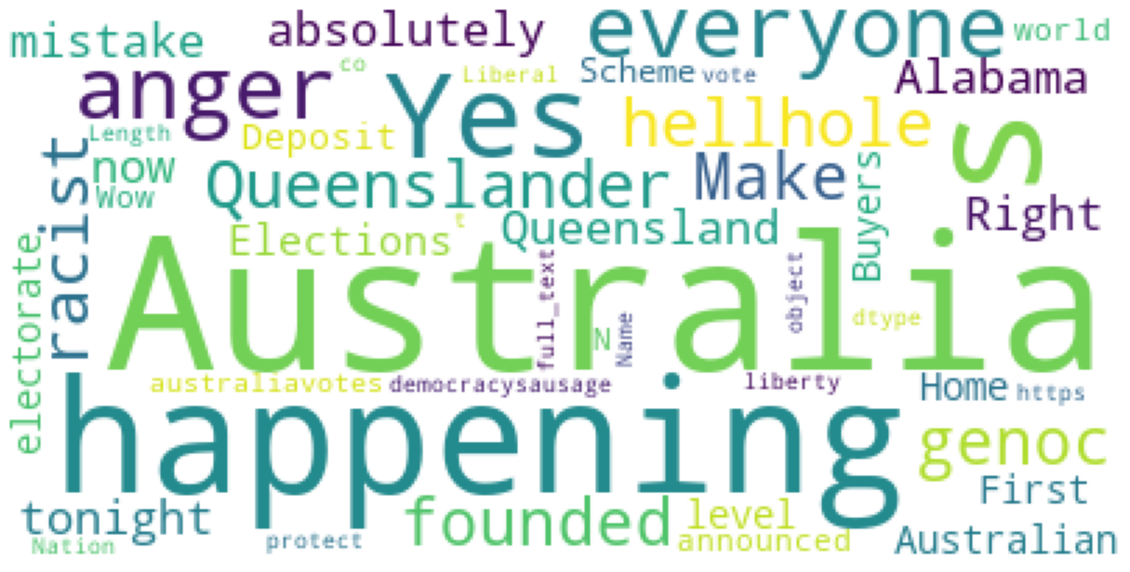

In [26]:
# make the worldcloud of the tweets
# import the libraries
from wordcloud import WordCloud, STOPWORDS

# display the wordcloud
wordcloud_ = WordCloud(
                          background_color='white',
                          stopwords=set(STOPWORDS)
                         ).generate(str(twitter['full_text'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud_)

## 3. The sentiment polarity analysis
In this section, I use sentiment polarity to determine which is the tweets that negative tweets or positive tweets. This chapter part included of NLP (Natural Language Processing)

In [27]:
# import TextBlob to determine polarity
from textblob import TextBlob

# make new column sentiment that fill polarity
twitter['sentiment'] = twitter['full_text'].map(lambda text: TextBlob(text).sentiment.polarity)


<ipython-input-27-1b1e7902c2e2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
# display the dataset

twitter.head()

created_at                   id  \
60  2019-05-18 13:59:51  1129748433936494594   
68  2019-05-18 12:06:10  1129719825071140866   
76  2019-05-18 11:23:57  1129709201029124096   
77  2019-05-18 11:16:44  1129707384765423616   
151 2019-05-16 07:24:05  1128924063710056449   

                                             full_text  retweet_count  \
60   Yes everyone, your anger with all Queenslander...           19.0   
68   Australia’s a racist hellhole founded on genoc...            4.0   
76   Make absolutely no mistake Australia, tonight’...           17.0   
77   #Queensland is the #Alabama of Australia. I'm ...            5.0   
151  Right now there are 2 Elections happening in A...            6.0   

     favorite_count       user_id                         user_name  \
60             79.0  7.354150e+17                    Daile Kelleher   
68             24.0  8.313634e+17  MJ O'Neill Before The Normal One   
76             28.0  2.359395e+09                         💧▌│█║▌║▌║   
77             38.0  1.849841e+09                         Ian Davis   
151            54.0  2.916126e+09                     Oscar O'Neill   

    user_screen_name                                   user_description  \
60     DaileKelleher  Manager at Children by Choice. Intersectional ...   
68     mjoneillnoise  Communications Wizard & Musical Also-Ran. Tryi...   
76   AnodyneParadigm  “Politics: “Poli” a Latin word meaning "many" ...   
77       Ian_Davis72  Pragmatist, Political observer, Punter, Pontif...   
151         _itsOzzY  17 | 🇦🇺 | Graphic designer for @Dropbearsgg an...   

            user_location     user_created_at                  name  \
60   Brisbane, Queensland 2016-05-25 10:19:26  Brisbane, Queensland   
68   Brisbane, Queensland 2017-02-14 04:44:11  Brisbane, Queensland   
76   Brisbane, Queensland 2014-02-24 11:54:33  Brisbane, Queensland   
77   Brisbane, Queensland 2013-09-10 00:16:39  Brisbane, Queensland   
151  Brisbane, Queensland 2014-12-02 03:43:12  Brisbane, Queensland   

           lat        long  created_at_weekday  user_created_at_weekday  \
60  -27.469771  153.025124                   5                        2   
68  -27.469771  153.025124                   5                        1   
76  -27.469771  153.025124                   5                        0   
77  -27.469771  153.025124                   5                        1   
151 -27.469771  153.025124                   3                        1   

     created_at_hour  user_created_at_hour  sentiment  
60                13                    10  -0.066667  
68                12                     4   0.000000  
76                11                    11   0.191667  
77                11                     0   0.136364  
151                7                     3   0.252143

In [29]:
# seperate the data

negative = twitter.loc[twitter['sentiment']==-1]
positive = twitter.loc[twitter['sentiment']==1]
netral = twitter.loc[twitter['sentiment']==0]

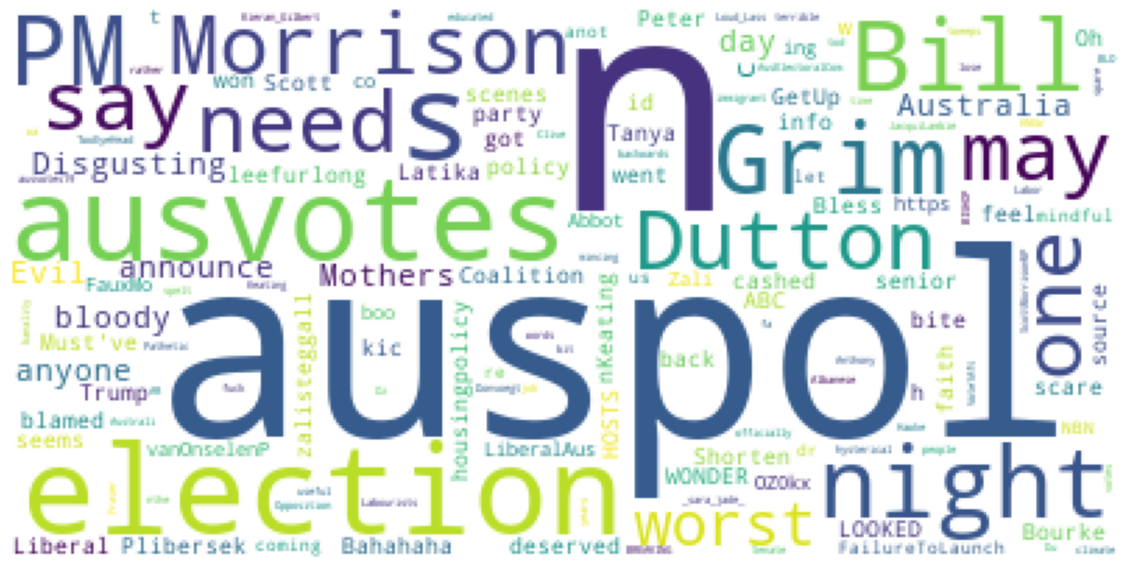

In [30]:
#wordcloud for the negative tweets

wordcloud_ = WordCloud(
                          background_color='white',
                          stopwords=set(STOPWORDS)
                         ).generate(str(negative['full_text'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud_)

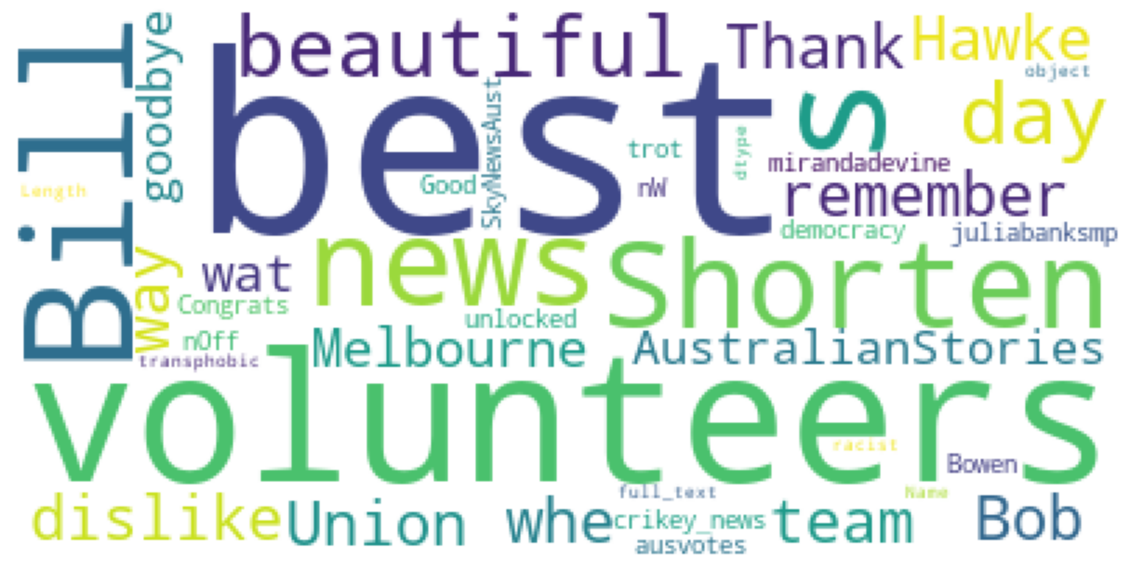

In [31]:
#wordcloud for positive tweets

wordcloud = WordCloud(
                        background_color ='white',
                        stopwords=set(STOPWORDS)).generate(str(positive['full_text'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1,figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud)

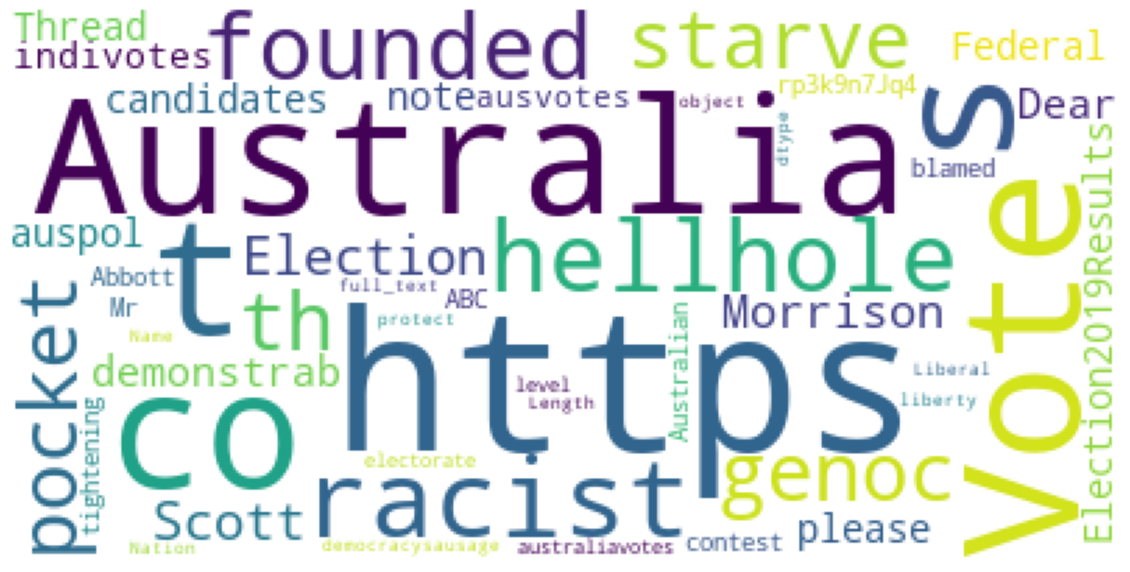

In [32]:
#wordcloud for netral tweets

wordcloud = WordCloud(
                        background_color ='white',
                        stopwords=set(STOPWORDS)).generate(str(netral['full_text'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1,figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud)

## 4. Checking the tweets with different polarities

In [33]:
# 5 random tweets with highest positive sentiment polarity

print("5 random tweets with highest positive sentiment polarity: \n")
cL = positive['full_text'].sample(10).values
for c in cL:
    print(c)
    print()

5 random tweets with highest positive sentiment polarity: 

I would like to nominate this wonderful person as HTV card volunteer of #AusVotes2019!!  #auspol👏👏👏👏 https://t.co/jPV4zcUvxZ

MY ANALYSIS: READ BEFORE #insiders #ausvotes Morrison turns Labor's strategy into perfect weapon to defeat them https://t.co/DiFi8ronCJ via @ABCNews

@TurnbullMalcolm @alexbhturnbull 🙏💔Thank you Mr Turnbull, grace, dignity and recognition for someone who always had the best of this nation on his mind with any decisions that his Govt made. #BobHawke #auspol #AUSVote2019

It’s a beautiful day for democracy! #ausvotes #auspol #democracysausage #DoItForBob

Another excellent piece from ⁦@BrigidWD⁩: ‘It's not you, Bill, it's the country': is this election Australia's Trump or Brexit moment? https://t.co/6a7lut9cMn

I’ve voted so now I can wear this proudly for the rest of the day!
#ausvotes #timeforchange #itstime #lightonthehill https://t.co/X3cSNgHOXM

Best before 2013 #auspol https://t.co/MnSiSouI3r

Dedi

In [34]:
# 5 random tweets with highest negative sentiment polarity

print("5 random tweets with highest negative sentiment polarity: \n")
cL = negative['full_text'].sample(10).values
for c in cL:
    print(c)
    print()

5 random tweets with highest negative sentiment polarity: 

Grim scenes at Shorten's election night party. 'It's not you, Bill, it's the country': is this election Australia's Trump or Brexit moment? | Brigid Delaney https://t.co/NAXdtdxrrY

This is disgusting. #auspol https://t.co/OZ0kxxg73U

“Clive” spelt backwards is “Evil C”

the bit i don’t get is what the “C” stands for? 🤔

#ausvotes #VoteStrategic

To all my #auspol/#ausvotes tweeps:
#Vote1AfterParty bcz we’ve bloody earned it!

#TheAfterParty https://t.co/Jy6dBiO58G

Latika Bourke: 'A senior Coalition source has just phoned me. I asked them 'how's it looking?' Their reply: 'Terrible!' - @latikambourke
https://t.co/S17HscKY6J
#ausvotes

It’s Mothers day let us be mindful of mothers; of stolen generations, those at the coalface of resistance, the colonised mothers, in detention centres, those on the cruel hopeless journey on leaky boats, mothers in camps, mothers who do not have mothers. #theyareus #auspol

@leefurlong @zalistegg

In [35]:
# 5 random tweets with netral sentiment polarity

print("5 random tweets with netral sentiment polarity: \n")
cL = netral['full_text'].sample(10).values
for c in cL:
    print(c)
    print()

5 random tweets with netral sentiment polarity: 

We want this. So does #MyMum #mothersday #ausvotes https://t.co/1TlRt3CmnI

The next three years will be a cross between Jimmy Swaggart and Campbell Newman on Steroids. #Auspol

#Newspoll NSW &amp; ACT Federal 2 Party Preferred: L/NP 51 (+1.1 since election) ALP 49 (-1.1) #auspol

Bill Shorten and Labor want to change the goal posts and increase tax on the savings you're relying on. #ausvotes #auspol https://t.co/GPnCTHcGFx

Placing flowers in memory of Bob Hawke #AusVotes19 #auspol @SBSNews https://t.co/cR7psXuh2C

Bombaderry public school. Gilmore #FairFunding  #ChangeTheRules #ausvotes https://t.co/gh34bnFCwE

Scott Morrison: “I have always believed in miracles.” @7NewsSydney @7NewsAustralia #ausvotes

Watch this 45s video. It's @GetUp in Warringah for @zalisteggall. Looks and sounds like a cult. #auspol #ausvotes #WarringahVotes https://t.co/7TzNlu7Fvu

The fact that the Liberal Party is attempting to ride on the coattails of Bob Ha

## 5. The count negative/positive tweets for the most populer party

### 5.1 Negative Sentiment

In [36]:
cL = negative.loc[twitter['full_text'].str.contains('Liberal'), ['full_text']].values
print('--the count negative sentiment tweets for Scott Morrison', cL.shape[0])
print("--the tweets with highest negative sentiment polarity for Scott Morrison:")
print('\n')
for c in cL:
    print(c[0])
    print()


--the count negative sentiment tweets for Scott Morrison 4
--the tweets with highest negative sentiment polarity for Scott Morrison:


Liberal policy for this election seems to be:
1) Re-hash Hawke-era ‘promise of Australia’ but twist it to justify anti-immigration stance;
2) Throw fuel onto the housing market
3) Hate on Bill Shorten
4) Pork barrels! Pork barrels for everyone.

Disgusting @LiberalAus’s boo’ing Zali in Abbott’s concession speech. #ausvotes #auspol

We need educated people in the Senate: Not a rabble and not Liberal stooge and the worst employer of the year named Clive Palmer.  LIBS are funding Palmer to cause chaos. The Spoiler. #auspol #AusVotes2019

What a classless and awful statement from Abbott. Bob Hawke would rise up from the grave, knowing he was being called a Liberal. #auspol2019 #auspol19 #auspol https://t.co/30kIiE7zWK



In [37]:
cL = negative.loc[twitter['full_text'].str.contains('Labor'), ['full_text']].values
print('--the count negative sentiment tweets for Bill Shorten', cL.shape[0])
print("--the tweets with highest negative sentiment polarity for Bill Shorten \n")

for c in cL:
    print(c[0])
    print()


--the count negative sentiment tweets for Bill Shorten 4
--the tweets with highest negative sentiment polarity for Bill Shorten 

Tanya Plibersek has blamed “a cashed-up scare campaign” from mining magnate Clive Palmer for contributing to Labor’s devastating loss in yesterday's election. #AusVotes2019 #auspol https://t.co/vsui6jDSut https://t.co/erWnFcKVLW

.@Kieran_Gilbert not mincing his words when asked what the mood is like at Labor HQ: "awful" #auspol

#BREAKING Anthony Albanese officially announces he'll be a candidate for Labor leader. He says the election is a "devastating result" for Labor and the party needs to examine the outcome #ausvotes https://t.co/OZrPyPU6bn

I'd rather be Labor and be in Opposition than be racist, sexist, homophobic, nasty, climate-deniers and be in Government.

#ThisIsLabor #auspol #ausvotes



### 5.2 Positive Sentiment

In [38]:
cL = positive.loc[twitter['full_text'].str.contains('Liberal'), ['full_text']].values
print('--the count positive sentiment tweets for Liberal', cL.shape[0])
print("--the tweets with highest negative sentiment polarity for Liberal: \n")
for c in cL:
    print(c[0])
    print() 


--the count positive sentiment tweets for Liberal 2
--the tweets with highest negative sentiment polarity for Liberal: 

"I have always believed in miracles. I'm standing with the three biggest miracles in my life here tonight! And tonight we've been delivered another one!" A very happy @ScottMorrisonMP claims victory at a Liberal function in Sydney. #Auspol #AusVotes19

I absofuckinglutely love this!!! 
Let’s make it trend!! 

Guess what Scummo and the @LiberalAus will be feeling Saturday night??!  

#SCOMOTOSE #SCOMATOSE 😊😉

#ausvotes #auspoI #Elections2019 https://t.co/jy4Jy9zx2j



In [39]:
cL = positive.loc[twitter['full_text'].str.contains('Labor'), ['full_text']].values
print('--the count positive sentiment tweets for Labor', cL.shape[0]) 
print("--the tweets with highest positive sentiment polarity for Labor \n")
for c in cL:
    print(c[0])
    print()


--the count positive sentiment tweets for Labor 14
--the tweets with highest positive sentiment polarity for Labor 

MY ANALYSIS: READ BEFORE #insiders #ausvotes Morrison turns Labor's strategy into perfect weapon to defeat them https://t.co/DiFi8ronCJ via @ABCNews

3 more hours to vote! Vote Labor in the house and the senate to end the chaos! It’s time for a change! Do it for Bob! #auspol #ausvotes https://t.co/vkSRx0S1It

Best T-shirt eva!!

I'm voting for Chloe Shorten's husband &amp; Ann Shorten's son!

Go Bill, Go Labor - All the very best to you team! 
#auspol #ausvotes #AusVotes2019 #ausvotes19 https://t.co/wAGsdFXjEz

Tones on #ABCnews just now was peppered with questions from journos re:his statement about Bob.

He repeatedly says 'He was the best Labor Prime Minister' while shaking his head 'No'.

No apology.

25 yrs in politics, still can't read the room. 
🐝
#auspol #ausvotes #ausvotes2019 https://t.co/WmHSTUtOJY

Tributes pour in for Bob Hawke, Labor's greatest PM, writes @